<a href="https://colab.research.google.com/github/ag20327/CE888/blob/main/Assignment_2/General_Specific_Normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **General Model**

Train First a Model with images from fire, then retrain that model with the required dataset

FireNet dataset

**Image preparation**

In [ ]:
# Unzip training data
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Training _Dataset.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
import os
# Get all the paths
data_dir_list = os.listdir('/content/Training Dataset')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/Training Dataset"))
file_count = len(files)
print(file_count)

['Fire', 'NoFire']
0


In [ ]:
# Make new base directory
original_dataset_dir = '/content/Training Dataset'
base_dir = '/content/data_divided'
os.mkdir(base_dir)

In [ ]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
"""
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
"""

"\ntest_dir = os.path.join(base_dir, 'test')\nos.mkdir(test_dir)\n"

Remove imgaes

fire1

nofire.631.jpg

In [ ]:
# Reorginize the images into folders of Train, Validation, Test
import shutil
# Fire
#Remove 1
for i in range(2,956):
    src = os.path.join(original_dataset_dir + "/Fire", 'fire{}.jpg'.format(i))
    dst = os.path.join(train_dir, 'fire.{}.jpg'.format(i))
    #print(src,dst)
    shutil.copyfile(src, dst)

for i in range(956,1125):
    src = os.path.join(original_dataset_dir + "/Fire", 'fire{}.jpg'.format(i))
    dst = os.path.join(validation_dir, 'fire.{}.jpg'.format(i))
    #print(src,dst)
    shutil.copyfile(src, dst)



# NoFire
for i in range(1,631):
    src = os.path.join(original_dataset_dir + "/NoFire", 'nofire{}.jpg'.format(i))
    dst = os.path.join(train_dir, 'nofire.{}.jpg'.format(i))
    #print(src,dst)
    shutil.copyfile(src, dst)
#Remove 631    
for i in range(632,1106):
    src = os.path.join(original_dataset_dir + "/NoFire", 'nofire{}.jpg'.format(i))
    dst = os.path.join(train_dir, 'nofire.{}.jpg'.format(i))
    #print(src,dst)
    shutil.copyfile(src, dst)

for i in range(1106,1238):
    src = os.path.join(original_dataset_dir + "/NoFire", 'nofire{}.jpg'.format(i))
    dst = os.path.join(validation_dir, 'nofire.{}.jpg'.format(i))
    #print(src,dst)
    shutil.copyfile(src, dst)

src = os.path.join(original_dataset_dir + "/NoFire", 'nf1238.jpg')
dst = os.path.join(validation_dir, 'nofire.{}.jpg'.format(1238))
#print(src,dst)
shutil.copyfile(src, dst)
for i in range(1239, 1302):
    src = os.path.join(original_dataset_dir + "/NoFire", 'nofire{}.jpg'.format(i))
    dst = os.path.join(validation_dir, 'nofire.{}.jpg'.format(i))
    #print(src,dst)
    shutil.copyfile(src, dst)

In [ ]:
path, dirs, files = next(os.walk("/content/data_divided/train"))
file_count = len(files)
print(file_count)

2058


In [ ]:
path, dirs, files = next(os.walk("/content/data_divided/validation"))
file_count = len(files)
print(file_count)

365


In [ ]:
import cv2
import numpy as np
from random import shuffle

IMG_SIZE = 299
LR = 1e-4

In [ ]:
def label_img(img):
    word_label = img.split('.')[0]
    if word_label == 'fire': return 0
    elif word_label == 'nofire': return 1


In [ ]:
def createDataSplitSet(datapath):
    X=[]
    y=[]
    i=1

    for img in os.listdir(datapath):
      if img != (".ipynb_checkpoints"):
        label = label_img(img)
        #print(i)
        #print((img))
        i+=1
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (299, 299))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)

In [ ]:
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)


Model preparation

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

image_size = (299, 299) #Expected input of Xception with 3 channels
batch_size = 32


In [ ]:
## Xception
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, Input, Flatten,SeparableConv2D,BatchNormalization,Activation,GlobalAveragePooling2D 
from tensorflow.keras import Model

img_input = Input(shape=(299, 299, 3))

In [ ]:
model = Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")


#model.summary()

91889664/91884032 [==============================] - 1s 0us/step


In [ ]:
num_classes = 1
last_layer = model.get_layer('block14_sepconv1_act').output

x= SeparableConv2D(2048, (3, 3) ,name='block14_sepconv2',padding="same",use_bias=False)(last_layer) #listo
x= BatchNormalization(name='block14_sepconv2_bn')(x)#listo
x = Activation (activation='relu', name='block14_sepconv2_act')(x)#listo
x = GlobalAveragePooling2D (name='avg_pool')(x)#listo


out = Dense(num_classes, activation='sigmoid', name='output')(x)  ## 2 classes
model = Model(img_input, out)

for layer in model.layers[:-5]:
	layer.trainable = False

#model.summary()

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]

In [ ]:
history = model.fit(train_X, train_y,
                               batch_size=32,
                               epochs=20, 
                               validation_data=(val_X, val_y),
                               callbacks=my_callbacks
                    )

Epoch 1/20
65/65 [==============================] - 23s 327ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0809 - val_acc: 0.9699
Epoch 2/20
65/65 [==============================] - 21s 322ms/step - loss: 0.0044 - acc: 0.9981 - val_loss: 0.0823 - val_acc: 0.9671
Epoch 3/20
65/65 [==============================] - 21s 323ms/step - loss: 8.5976e-04 - acc: 1.0000 - val_loss: 0.0932 - val_acc: 0.9671
Epoch 4/20
65/65 [==============================] - 21s 325ms/step - loss: 7.6135e-04 - acc: 1.0000 - val_loss: 0.0772 - val_acc: 0.9671
Epoch 5/20
65/65 [==============================] - 21s 327ms/step - loss: 5.8917e-04 - acc: 1.0000 - val_loss: 0.0759 - val_acc: 0.9699
Epoch 6/20
65/65 [==============================] - 21s 329ms/step - loss: 0.0020 - acc: 0.9995 - val_loss: 0.0769 - val_acc: 0.9699
Epoch 7/20
65/65 [==============================] - 21s 330ms/step - loss: 0.0015 - acc: 0.9990 - val_loss: 0.0979 - val_acc: 0.9671
Epoch 8/20
65/65 [==============================] - 22s 3

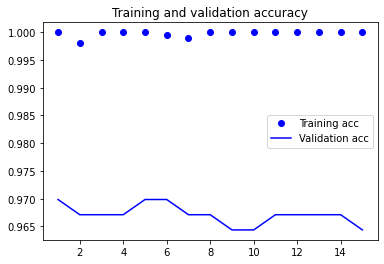

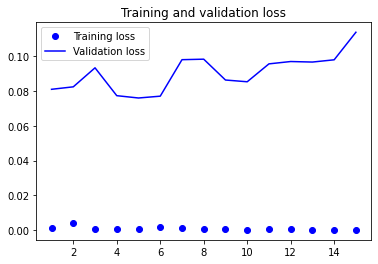

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save(r"/content/drive/MyDrive/DataScience/Saved_Model_General")

# **General/Specific Model**

To test with rotation or non rotation, rerun this cells and training while changing the data agumentation accordingly

*Change model save path for each model correspondigly

Train on FLAME Dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

image_size = (299, 299) #Expected input of Xception with 3 channels
batch_size = 32

In [ ]:
model = keras.models.load_model(r"/content/drive/MyDrive/DataScience/Saved_Model_General")

In [ ]:
directory = r"/content/drive/MyDrive/DataScience/Data/Train_Revised" #Location of folder

In [ ]:
#Load the data into Python and divide into training and validation
#The data is loaded shuffled to reduce bias
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    color_mode="rgb",#3 Channels
    batch_size=batch_size,
    image_size=image_size, #Image resizing
    shuffle=True,
    seed=9999,
    validation_split=0.15,
    subset="training",
)

Found 36593 files belonging to 2 classes.
Using 31105 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(

    directory,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=9999,
    validation_split=0.15,
    subset="validation",
)

Found 36593 files belonging to 2 classes.
Using 5488 files for validation.


In [ ]:
#Data augmentation with experimental layers
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        #layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.Rescaling(1./255),
        #layers.experimental.preprocessing.RandomContrast(0.5),
    ]
)

#Augmentate the complete dataset for trainning and validation
augmented_train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))

augmented_val_ds = val_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))

#buffered prefetching for performance
augmented_train_ds = augmented_train_ds.prefetch(buffer_size=32)
augmented_val_ds = augmented_val_ds.prefetch(buffer_size=32)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='Xception_model.h5', save_best_only=True),
]

In [ ]:
history = model.fit(augmented_train_ds,
                               epochs=10, 
                               validation_data=augmented_val_ds,
                               callbacks=my_callbacks
                    )

Epoch 1/10
973/973 [==============================] - 13883s 14s/step - loss: 0.0217 - acc: 0.9950 - val_loss: 0.0444 - val_acc: 0.9851
Epoch 2/10
973/973 [==============================] - 474s 486ms/step - loss: 0.0064 - acc: 0.9984 - val_loss: 0.0061 - val_acc: 0.9980
Epoch 3/10
973/973 [==============================] - 474s 486ms/step - loss: 0.0098 - acc: 0.9977 - val_loss: 0.0087 - val_acc: 0.9978
Epoch 4/10
973/973 [==============================] - 474s 486ms/step - loss: 0.0064 - acc: 0.9987 - val_loss: 0.0233 - val_acc: 0.9914
Epoch 5/10
973/973 [==============================] - 473s 485ms/step - loss: 0.0105 - acc: 0.9975 - val_loss: 0.0110 - val_acc: 0.9973
Epoch 6/10
973/973 [==============================] - 472s 485ms/step - loss: 0.0051 - acc: 0.9988 - val_loss: 0.0029 - val_acc: 0.9993
Epoch 7/10
973/973 [==============================] - 473s 486ms/step - loss: 0.0050 - acc: 0.9987 - val_loss: 0.0025 - val_acc: 0.9991
Epoch 8/10
973/973 [============================

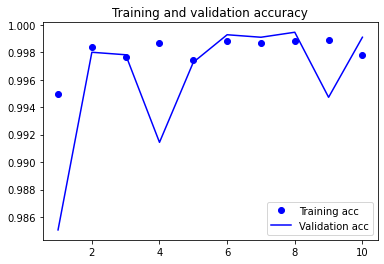

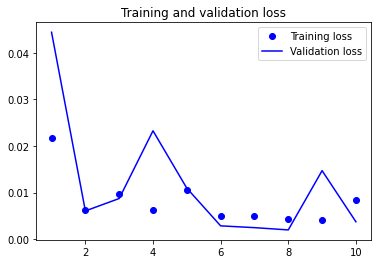

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save(r"/content/drive/MyDrive/DataScience/Saved_Model_General/Specific_No_Rot")

# **Test**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

image_size = (299, 299) #Expected input of Xception with 3 channels
batch_size = 32

In [ ]:
image_size = (299, 299) #Expected input of Xception with 3 channels
batch_size = 32
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"/content/drive/MyDrive/DataScience/Data/Test _Revised",
    color_mode="rgb",
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
)


Found 7924 files belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers
#Data augmentation with experimental layers
data_augmentation = keras.Sequential(
    [
        #layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        #layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.Rescaling(1./255),
    ]
)

#Augmentate the complete dataset for trainning and validation
augmented_test_ds = test_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))



#buffered prefetching for performance
augmented_test_ds = augmented_test_ds.prefetch(buffer_size=32)

General Case on Revised Test

In [ ]:
model = keras.models.load_model(r"/content/drive/MyDrive/DataScience/Saved_Model_General")

In [ ]:
print("Evaluate on test data")
results = model.evaluate(augmented_test_ds)
print("test loss, test acc:", results)

Evaluate on test data
248/248 [==============================] - 2959s 11s/step - loss: 2.2603 - acc: 0.6233
test loss, test acc: [2.2603116035461426, 0.623296320438385]


General/Specific Rotation applied

In [ ]:
model = keras.models.load_model(r"/content/drive/MyDrive/DataScience/Saved_Model_General/Specific_Rot")

In [ ]:
print("Evaluate on test data")
results = model.evaluate(augmented_test_ds)
print("test loss, test acc:", results)

Evaluate on test data
248/248 [==============================] - 2818s 11s/step - loss: 1.5636 - acc: 0.7249
test loss, test acc: [1.5635502338409424, 0.724886417388916]


General/Specifc **No** Rotation applied

In [ ]:
model = keras.models.load_model(r"/content/drive/MyDrive/DataScience/Saved_Model_General/Specific_No_Rot")

In [ ]:
print("Evaluate on test data")
results = model.evaluate(augmented_test_ds)
print("test loss, test acc:", results)

Evaluate on test data
248/248 [==============================] - 31s 120ms/step - loss: 0.3795 - acc: 0.8973
test loss, test acc: [0.3794694244861603, 0.8972740769386292]
